<a href="https://colab.research.google.com/github/horsinnaround/Depression-text-analysis/blob/main/Depression_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Some information **
this work is about finding out depression by reading text
the best result from now are:

acc  89.58 

pre: 84.09 

recal:  66.11

f1:  73.96 

dep :66.11

non-dep: 96.38

# imports

In [ ]:
# Optimizers import
!pip install mealpy
import mealpy
from mealpy.bio_based import BBO, EOA, IWO, SBO, SMA, TPO, VCS, WHO
from mealpy.evolutionary_based import CRO, DE, EP, ES, FPA, GA, MA
from mealpy.human_based import BRO, BSO, CA, CHIO, FBIO, GSKA, ICA, LCO, QSA, SARO, SSDO, TLO
from mealpy.math_based import AOA, CGO, GBO, HC, SCA, PSS
from mealpy.music_based import HS
from mealpy.physics_based import ArchOA, ASO, EFO, EO, HGSO, MVO, NRO, SA, TWO, WDO
# from mealpy.probabilistic_based import CEM
from mealpy.system_based import AEO, GCO, WCA
from mealpy.swarm_based import ABC, ACOR, ALO, AO, BA, BeesA, BES, BFO, BSA, COA, CSA, CSO, DO, EHO, FA, FFA, FOA, GOA, GWO, HGS
from mealpy.swarm_based import HHO, JA, MFO, MRFO, MSA, NMRA, PFA, PSO, SFO, SHO, SLO, SRSR, SSA, SSO, SSpiderA, SSpiderO, WOA

# Models import
!pip install catboost
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.cluster import KMeans #one with clusterimg (disaster)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor ,HistGradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,StackingClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.dummy import DummyClassifier #that zero
from catboost import CatBoostClassifier 
from sklearn.svm import SVC, SVR, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

# TensorFlow import
%tensorflow_version 2.x
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

# Metrics import
from sklearn import model_selection
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, cohen_kappa_score, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, jaccard_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import datasets, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
# Modules import

from sys import exit
import tweepy
import webbrowser
import time
import datetime
import threading
import matplotlib.pyplot as plt
from six.moves import urllib
from pandas.plotting import scatter_matrix
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np 
import pandas as pd 
import seaborn as sns
import itertools
import random as rn
from time import time
import warnings
import os
from IPython.display import clear_output

# Sampling
from imblearn.over_sampling import SVMSMOTE ,SMOTENC,ADASYN,KMeansSMOTE,BorderlineSMOTE,RandomOverSampler,SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import AllKNN,NearMiss,RandomUnderSampler

import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)
clear_output()
print("WELLCOME TO IMPLEMENTATION")

WELLCOME TO IMPLEMENTATION


In [ ]:
# Some Options
random_state= 47

sns.set(rc={"figure.dpi":100, 'savefig.dpi':600})
sns.set_context('notebook')
sns.set_style("ticks")
warnings.filterwarnings("ignore", category=DeprecationWarning)
lpalette = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r']
'darkgrid, whitegrid, dark, white, ticks'
sns.set_theme(style="whitegrid")
sns.set_style('whitegrid')
sns.set_palette('tab10')
palette = 'tab10'

# File

In [ ]:
# Unzipping
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/A Work/Depression text/Dep.zip', "r")
zip_ref.extractall('/content/drive/MyDrive/A Work/Depression text/')
zip_ref.close()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/A Work/Depression text/sentiment_tweets3.csv')
df.head()

Unnamed: 0                                            message  label
0         106  just had a real good moment. i missssssssss hi...      0
1         217         is reading manga  http://plurk.com/p/mzp1e      0
2         220  @comeagainjen http://twitpic.com/2y2lx - http:...      0
3         288  @lapcat Need to send 'em to my accountant tomo...      0
4         540      ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0

In [ ]:
root = '/content/drive/MyDrive/A Work/Depression text'

In [ ]:
data=df
data.columns

Index(['Unnamed: 0', 'message', 'label'], dtype='object')

In [ ]:
data.drop(f'{data.columns[0]}',axis = 1, inplace=True)
target = 'label'

In [ ]:
data

message  label
0      just had a real good moment. i missssssssss hi...      0
1             is reading manga  http://plurk.com/p/mzp1e      0
2      @comeagainjen http://twitpic.com/2y2lx - http:...      0
3      @lapcat Need to send 'em to my accountant tomo...      0
4          ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0
...                                                  ...    ...
10309  No Depression by G Herbo is my mood from now o...      1
10310  What do you do when depression succumbs the br...      1
10311  Ketamine Nasal Spray Shows Promise Against Dep...      1
10312  dont mistake a bad day with depression! everyo...      1
10313                                                  0      1

[10314 rows x 2 columns]

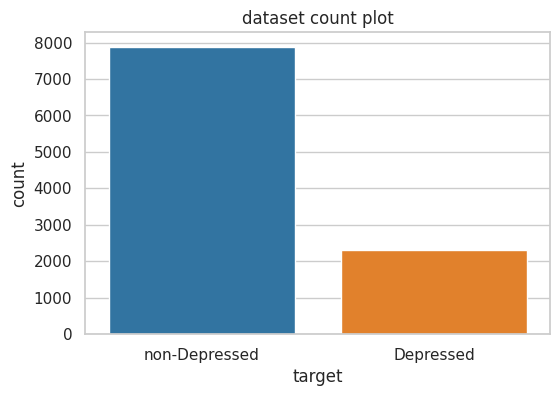

In [ ]:
pal = "tab10"
sns.set_palette(pal)
palette = pal
sns.countplot(x=target, data=data)
plt.title('dataset count plot')
plt.xticks(rotation=0,ticks=[0,1],labels=['non-Depressed','Depressed'])
plt.savefig(f'{root}/bar_plot.png')
plt.show()

In [ ]:
data.label.value_counts()

0    8000
1    2314
Name: label, dtype: int64

# PreProssecing

In [ ]:
import string
import re

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/A Work/Depression text/sentiment_tweets3.csv')
len(df)

10314

In [ ]:
data = df.drop(f'{df.columns[0]}',axis=1)

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree


In [ ]:
def stf(text):
    text = text.replace('\\r','')
    text = text.replace('\\n','')
    return text

In [ ]:
def nana(text):
    return len(text.split())

In [ ]:
def k(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\S+", '', text) 
    return text

In [ ]:
#storing the puntuation free text
data['message_re']= df['message'].apply(lambda x:k(x))
data['message_re']= data['message_re'].apply(lambda x:remove_punctuation(x))
data['nan']= data['message_re'].apply(lambda x:nana(x))
data = data[data['nan']>2]
del  data['nan']
len(data)

9916

In [ ]:
data

message  label  \
0      just had a real good moment. i missssssssss hi...      0   
1             is reading manga  http://plurk.com/p/mzp1e      0   
3      @lapcat Need to send 'em to my accountant tomo...      0   
4          ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0   
5                  so sleepy. good times tonight though       0   
...                                                  ...    ...   
10308  Many sufferers of depression aren't sad; they ...      1   
10309  No Depression by G Herbo is my mood from now o...      1   
10310  What do you do when depression succumbs the br...      1   
10311  Ketamine Nasal Spray Shows Promise Against Dep...      1   
10312  dont mistake a bad day with depression! everyo...      1   

                                              message_re  
0      just had a real good moment i missssssssss him...  
1                                     is reading manga    
3       Need to send em to my accountant tomorrow Odd...  
4               ADD ME ON MYSPACE  myspacecomLookThunder  
5                   so sleepy good times tonight though   
...                                                  ...  
10308  Many sufferers of depression arent sad they fe...  
10309  No Depression by G Herbo is my mood from now o...  
10310  What do you do when depression succumbs the br...  
10311  Ketamine Nasal Spray Shows Promise Against Dep...  
10312  dont mistake a bad day with depression everyon...  

[9916 rows x 3 columns]

In [ ]:
del  data['message']

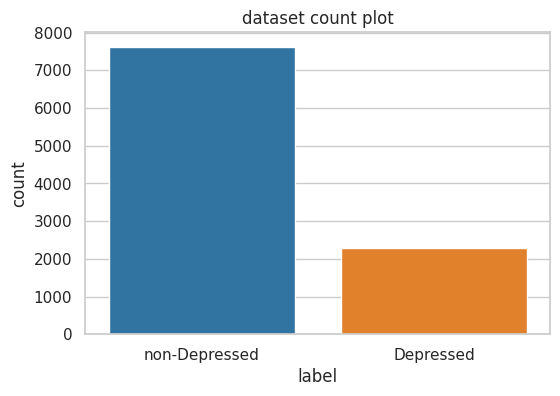

In [ ]:
pal = "tab10"
sns.set_palette(pal)
palette = pal
target='label'
sns.countplot(x=target, data=data)
plt.title('dataset count plot')
plt.xticks(rotation=0,ticks=[0,1],labels=['non-Depressed','Depressed'])
plt.savefig(f'{root}/bar_plot_after_preprossecing.png')
plt.show()

In [ ]:
data.label.value_counts()

0    7631
1    2285
Name: label, dtype: int64

In [ ]:
df.label.value_counts()

0    8000
1    2314
Name: label, dtype: int64

In [ ]:
data

label                                         message_re
0          0  just had a real good moment i missssssssss him...
1          0                                 is reading manga  
3          0   Need to send em to my accountant tomorrow Odd...
4          0           ADD ME ON MYSPACE  myspacecomLookThunder
5          0               so sleepy good times tonight though 
...      ...                                                ...
10308      1  Many sufferers of depression arent sad they fe...
10309      1  No Depression by G Herbo is my mood from now o...
10310      1  What do you do when depression succumbs the br...
10311      1  Ketamine Nasal Spray Shows Promise Against Dep...
10312      1  dont mistake a bad day with depression everyon...

[9916 rows x 2 columns]

In [ ]:
# del data['message_re']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer


In [ ]:
# text to vector
# next line must be run just one time
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='utf-8', ngram_range=(1, 2), stop_words='english')

# these lines will run again and again
features = tfidf.fit_transform(data.message_re).toarray()
label  = data['label']

features.shape

(9916, 2897)

In [ ]:
from sklearn.decomposition import PCA
# next line must be run just one time
pca = PCA(n_components=100, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto',random_state=None)

# these lines will run again and again
features = pca.fit_transform(features)
features.shape

(9916, 100)

In [ ]:
label.value_counts()

0    7631
1    2285
Name: label, dtype: int64

In [ ]:
label = list(label)

In [ ]:
data = pd.DataFrame(features)
print(len(data))
data['target'] = label
print(len(data))

9916
9916


In [ ]:
data.target.value_counts()

0    7631
1    2285
Name: target, dtype: int64

# Models and other Options

In [ ]:
model_list_All = [
    VotingClassifier(estimators=[
        ('lr', XGBClassifier(random_state= random_state)),
        ('rf', RandomForestClassifier(random_state= random_state)),
        ('gnb', MLPClassifier(random_state= random_state))],
        voting='soft'),
    HistGradientBoostingClassifier(random_state= random_state),
    # RadiusNeighborsClassifier(random_state= random_state),
    SGDClassifier(random_state= random_state),
    GaussianProcessClassifier(random_state= random_state),
    AdaBoostClassifier(random_state= random_state),
    # ExtraTreesClassifier(random_state= random_state),
    RandomForestClassifier(random_state= random_state),
    LinearSVC(),
    KNeighborsClassifier(),
    MultinomialNB(),
    DecisionTreeClassifier(random_state= random_state),
    SVC(),
    MLPClassifier(random_state= random_state),
    XGBClassifier(random_state= random_state),
    CatBoostClassifier(verbose=0,random_state= random_state),
    LogisticRegression(random_state= random_state),
]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_list = [
    # VotingClassifier(estimators=[
    #     ('lr', XGBClassifier(random_state= random_state)),
    #     ('rf', RandomForestClassifier(random_state= random_state)),
    #     ('gnb', MLPClassifier(random_state= random_state))],
    #     voting='soft'),
    HistGradientBoostingClassifier(random_state= random_state),
    # RadiusNeighborsClassifier(random_state= random_state),
    # KNeighborsClassifier(),
    SGDClassifier(random_state= random_state),
    # GaussianProcessClassifier(random_state= random_state),
    # AdaBoostClassifier(random_state= random_state),
    # ExtraTreesClassifier(random_state= random_state),
    # RandomForestClassifier(random_state= random_state),
    # LinearSVC(),
    # MultinomialNB(),
    # DecisionTreeClassifier(random_state= random_state),
    # SVC(),
    # MLPClassifier(random_state= random_state),
    # XGBClassifier(random_state= random_state),
    # CatBoostClassifier(verbose=0),
    # LogisticRegression(random_state= random_state),
]

In [ ]:
scors = ['accuracy', 'precision', 'recall', 'f1','roc_auc','jaccard']

In [ ]:
samples = ['SVMSMOTE','AllKNN','NearMiss','RandomUnderSampler','KMeansSMOTE',"ADASYN",'BorderlineSMOTE','RandomOverSampler','SMOTE','SMOTETomek','SMOTEENN']

# Functions

## Factorize(data,target,slakdata)

In [ ]:
def Factorize(data,target,slakdata):
    slakdata[target] = data[target]
    slk = data[target].factorize()[0]
    slakdata[f'{target}-Factorize'] = slk
    del data[target]
    data[target] = slk
    slakdata.to_excel(f'{root}/factorized_label.xlsx')
    data.to_excel(f'{root}/data_cleaned.xlsx')
    print("Done")
    return data, slakdata

In [ ]:
target = 'diagnosis'
data, slakdata = Factorize(data,target,slakdata)

Done


## Simply replace

In [ ]:
def Replace(data,target,slakdata,label,tolabel):
    slakdata[target] = data[target]
    slk = data[target].replace({label[0]:tolabel[0],label[1]:tolabel[1]})
    # slk = data[target].factorize()[0]
    slakdata[f'{target}-Factorize'] = slk
    del data[target]
    data[target] = slk
    slakdata.to_excel(f'{root}/factorized_label.xlsx')
    data.to_excel(f'{root}/data_cleaned.xlsx')
    print("Done")
    return data, slakdata

In [ ]:
target = 'diagnosis'
data[target].value_counts()

Benign       357
Malicious    212
Name: diagnosis, dtype: int64

In [ ]:
label, tolabel = ['Benign','Malicious'],[0,1]
data, slakdata = Replace(data, target, slakdata, label, tolabel)

Done


In [ ]:
data[target].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## data_split(data,target)

In [ ]:
def data_split(data,target):
    features = data.drop(target,axis=1)
    labels = data[target]
    return features,labels

In [ ]:
features,labels = data_split(data=data,target='target')

In [ ]:
CV = 5
k_fold = KFold(n_splits=CV,shuffle=True, random_state=random_state)

## Bar_Plot(data,target,root,palette=palette,rotation=0,tic1=None,tic2=None)

In [ ]:
palette='tab10'
tic1,tic2 = [0,1],["Non-Depressed","Depressed"]
def Bar_Plot(data,target,root,palette=palette,rotation=0,tic1=None,tic2=None):
    sns.countplot(x=target, data=data,palette=palette)
    plt.title('count plot')

    plt.xticks(rotation=0,ticks=tic1,labels=tic2)
    plt.savefig(f'{root}/Bar_Plot.jpg',bbox_inches='tight')
    plt.show()

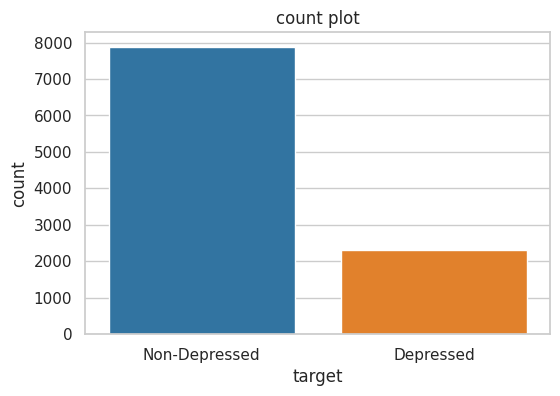

In [ ]:
# palette='Set1'
target='target'
# tic1,tic2 = [0,1],["Benign","Malicious"]
Bar_Plot(data,target,root,palette=palette,rotation=0,tic1=tic1,tic2=tic2)

In [ ]:
data

## Starting Shit

In [ ]:
def sampling_NO_PLT_(data,target,sample,random_state):
    print(len(labels))
    print(random_state)
    try:
        sm = str_to_class(sample)(sampling_strategy='auto', 
                    random_state=random_state)
    except:
        sm = str_to_class(sample)(sampling_strategy='auto')
    print(sample)
    data_,labels_ = sm.fit_resample(data,target)
    print(len(labels_))
    return data_,labels_

X_train, y_train = sampling_NO_PLT_(data=X_train,target=y_train,sample=sample,random_state=random_state)


9101
47
SMOTEENN
11554


In [ ]:
%%time

# lis = [j for j in models_name[0:iter]]
# list of models:
# models = [XGBClassifier(max_depth=int(i[0]),n_estimators=int(i[1]),learning_rate=i[2]) for i in acc_mode[0:iter]]
scores_list = []
# models = []

# model_list = [
#     RandomForestClassifier(n_estimators=20, max_depth=3, random_state=0, max_features=20),
#     LinearSVC(),
#     DecisionTreeRegressor(),
#     KNeighborsClassifier(),
#     MLPClassifier(max_iter=500,early_stopping=True),
#     XGBClassifier(),
#     # CatBoostClassifier(verbose=0),
#     LogisticRegression(random_state=0,max_iter=1000),
#     SVC(),
#     # MLPClassifier(),
#     # GaussianNB()
# ]

# ns_list = [1000,5000,9000,13000,19000] # number of samples that we want to keep
n_avg = 5 # Number of times to average over
duration_fit_list=[]
duration_pred_list=[]
accuracy_score_list=[]
weighted_precision_score_list=[]
weighted_recall_score_list=[]
weighted_f1_score_list=[]
entries = []
sample = samples[-1]
for model in model_list:   # For different number of samples, we try training our estimator
    print(f"for {model} strated.")
    clf = model
    duration_fit=0
    duration_pred=0
    accuracy_scores = 0
    weighted_precision_scores = 0
    weighted_recall_scores = 0
    weighted_f1_scores = 0
    # print("4")

    e_in = 0
    e_out = 0   # For each, we record the in and out score. 
    for train_indices, test_indices in k_fold.split(features, labels ):
        

        # dataaa.append((p,(train_indices, test_indices)))

        # print('Train: %s | test: %s' % (len(train_indices), len(test_indices)))
        # X_train, y_train, X_test, y_test  = features.iloc[train_indices],labels.iloc[train_indices],features.iloc[test_indices],labels.iloc[test_indices]
        X_train, y_train, X_test, y_test  = features.iloc[train_indices],labels.iloc[train_indices],features.iloc[test_indices],labels.iloc[test_indices]
        X_train, y_train = sampling_NO_PLT_(data=X_train,target=y_train,sample=sample,random_state=random_state)
        start_fit = time()
        clf.fit(X = X_train, y = y_train)
        end_fit = time()
        duration_fit += end_fit - start_fit # time duration for fitting
        
        start_pred = time()
        Y_pred = clf.predict(X_test)
        end_pred = time()
        duration_pred += end_pred - start_pred # time duration for predicting
        
        accuracy_scores += round(accuracy_score(y_test, Y_pred), 4)
        weighted_precision_scores += round(precision_score(y_test, Y_pred, average='weighted',zero_division=1), 4)
        weighted_recall_scores += round(recall_score(y_test, Y_pred, average='weighted'), 4)
        weighted_f1_scores += round(f1_score(y_test, Y_pred, average='weighted'), 4)
        entries.append((model.__class__.__name__ , accuracy_score(y_test, Y_pred),precision_score(y_test, Y_pred, average='weighted',zero_division=1),
                        recall_score(y_test, Y_pred, average='weighted'),f1_score(y_test, Y_pred, average='weighted')))
    duration_fit_list.append(duration_fit/n_avg)
    duration_pred_list.append(duration_pred/n_avg)
    accuracy_score_list.append(accuracy_scores/n_avg)
    weighted_precision_score_list.append(weighted_precision_scores/n_avg)
    weighted_recall_score_list.append(weighted_recall_scores/n_avg)
    weighted_f1_score_list.append(weighted_f1_scores/n_avg)
    

model_list_name = ((f"{i.__class__.__name__}") for j ,i in enumerate(model_list)) # a list for the names of models

report_data = pd.DataFrame(model_list_name, columns=['model'])
report_data['fit_duration'] = duration_fit_list
report_data['pred_duration'] = duration_pred_list
report_data['accuracy'] = accuracy_score_list
report_data['weighted_precision'] = weighted_precision_score_list
report_data['weighted_recall'] = weighted_recall_score_list
report_data['weighted_f1_score'] = weighted_f1_score_list
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy', 'weighted precision', 'weighted recall', 'weighted f1'])
# report_data.to_csv("./report_data.csv")
# cv_df.to_csv('./barplot_clf.csv')
# print(cv_df['accuracy'])

# report_data.to_excel(f'/content/drive/MyDrive/data/{folder}/Scores_for_all_models_smote.xlsx')
clear_output()

CPU times: user 1min 13s, sys: 4.65 s, total: 1min 18s
Wall time: 1min 3s


In [ ]:
print(len(X_train)) #12258

print(len(X_test)) #1983
report_data

11024
1983


model  fit_duration  pred_duration  accuracy  \
0  HistGradientBoostingClassifier      3.706278       0.046127   0.98812   
1                   SGDClassifier      0.042034       0.002922   0.98880   

   weighted_precision  weighted_recall  weighted_f1_score  
0             0.98808          0.98812            0.98806  
1             0.98894          0.98880            0.98870

In [ ]:
print(len(X_train)) #12258

print(len(X_test)) #1983
report_data

12258
1983


model  fit_duration  pred_duration  accuracy  \
0  HistGradientBoostingClassifier      2.787051       0.018861   0.98952   
1                   SGDClassifier      0.075483       0.002683   0.98740   

   weighted_precision  weighted_recall  weighted_f1_score  
0             0.98952          0.98952            0.98946  
1             0.98742          0.98740            0.98734

In [ ]:
print(len(X_train)) #12258

print(len(X_test)) #1983
report_data

12258
1983


model  fit_duration  pred_duration  accuracy  \
0  HistGradientBoostingClassifier       2.77066       0.019813   0.99022   
1                   SGDClassifier       0.06113       0.004118   0.98900   

   weighted_precision  weighted_recall  weighted_f1_score  
0             0.99030          0.99022            0.99016  
1             0.98914          0.98900            0.98890

In [ ]:
print(len(X_test)) #749
report_data

1983


model  fit_duration  pred_duration  accuracy  \
0  HistGradientBoostingClassifier      4.321788       0.027728    0.9896   
1                   SGDClassifier      0.032077       0.003398    0.9890   

   weighted_precision  weighted_recall  weighted_f1_score  
0             0.98974           0.9896            0.98954  
1             0.98914           0.9890            0.98890

In [ ]:
report_data

model  fit_duration  pred_duration  accuracy  \
0  HistGradientBoostingClassifier      1.697938       0.009701    0.9717   
1                   SGDClassifier      0.018752       0.002974    0.9792   

   weighted_precision  weighted_recall  weighted_f1_score  
0             0.97222           0.9717            0.97152  
1             0.97984           0.9792            0.97902

In [ ]:
report_data

model  fit_duration  pred_duration  accuracy  \
0  HistGradientBoostingClassifier      2.089029       0.019410   0.98858   
1            KNeighborsClassifier      0.010692       0.517733   0.89312   
2                   SGDClassifier      0.038083       0.002874   0.98814   
3                   XGBClassifier      6.434494       0.009368   0.98728   

   weighted_precision  weighted_recall  weighted_f1_score  
0             0.98860          0.98858            0.98852  
1             0.91036          0.89312            0.89716  
2             0.98828          0.98814            0.98804  
3             0.98726          0.98728            0.98722

In [ ]:
report_data

model  fit_duration  pred_duration  accuracy  \
0  HistGradientBoostingClassifier      2.612579       0.019109   0.98964   
1            KNeighborsClassifier      0.012478       0.702203   0.90818   
2                   SGDClassifier      0.045949       0.004367   0.98866   
3          DecisionTreeClassifier      1.501808       0.002939   0.97470   
4                   MLPClassifier     24.956782       0.006786   0.98886   
5                   XGBClassifier      8.015592       0.010325   0.98974   

   weighted_precision  weighted_recall  weighted_f1_score  
0             0.98968          0.98964            0.98958  
1             0.92202          0.90818            0.91166  
2             0.98880          0.98866            0.98854  
3             0.97520          0.97470            0.97484  
4             0.98888          0.98886            0.98878  
5             0.98978          0.98974            0.98964

## Correlation_matrix(data,root,name)

In [ ]:
def Correlation_matrix(data,root,name):
    corr = data.corr()
    plt.figure(figsize=(12,12))
    sns.heatmap(corr,xticklabels=1)
    plt.savefig(f'{root}/Correlation_matrix_{name}.jpg',bbox_inches='tight')
    corr.to_excel(f'{root}/Correlation_matrix_{name}.xlsx')
    plt.show()

In [ ]:
name='Features_target'
target = 'diagnosis'
Correlation_matrix(data=data,root=root,name=name)

In [ ]:
corr = data.corr()
fig = plt.figure(figsize=(9,9),dpi=600)
plt.matshow(corr, cmap = 'RdBu', fignum = fig.number,)
plt.xticks(range(len(corr.columns)),corr.columns, rotation = 'vertical');
plt.yticks(range(len(corr.columns)),corr.columns);
plt.savefig(f'{root}/Correlation_matrix_{name}.jpg',bbox_inches='tight')

## Cross validation for a specific model and score and sampling
sampling_NO_PLT AND Cross_Vals

In [ ]:
def sampling_NO_PLT(data,target,sample,random_state):
    print(len(labels))
    print(random_state)
    try:
        sm = str_to_class(sample)(sampling_strategy='auto', 
                    random_state=random_state)
    except:
        sm = str_to_class(sample)(sampling_strategy='auto')
    print(sample)
    data_,labels_ = sm.fit_resample(data,data[target])
    print(len(labels_))
    return data_,labels_

10314
47
SMOTE
12758


In [ ]:
k_fold = KFold(n_splits=5,shuffle=True, random_state=random_state)

In [ ]:
def Cross_Vals(model,features,labels,score,cv=5,mean=1):
    k_fold = KFold(n_splits=cv,shuffle=True, random_state=random_state)
    print(model)
    tar = cross_val_score(model,features,labels,scoring=score,cv=k_fold)
    if mean==1:
        tar = tar.mean()
    else:
        pass
    return tar

In [ ]:
print(scors)
print(model_list)
print(samples)


['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'jaccard']
[HistGradientBoostingClassifier(random_state=47), KNeighborsClassifier(), SGDClassifier(random_state=47), DecisionTreeClassifier(random_state=47), MLPClassifier(random_state=47), XGBClassifier(random_state=47)]
['SVMSMOTE', 'AllKNN', 'NearMiss', 'RandomUnderSampler', 'KMeansSMOTE', 'ADASYN', 'BorderlineSMOTE', 'RandomOverSampler', 'SMOTE', 'SMOTETomek', 'SMOTEENN']


In [ ]:
target = 'target'

In [ ]:
sample = samples[8]
model = model_list[5]
score = scors[3]
k_fold = KFold(n_splits=CV,shuffle=True, random_state=random_state)

# data_,labels_ = sampling_NO_PLT(data=data,target=target,sample=sample,random_state=random_state)
data_,labels_ = data,labels
for model in model_list:
    # try:
        vl = Cross_Vals(model,data_.drop(target,axis=1),labels_,score,cv=5,mean=1)
        # clear_output()
        print(f'{model} and {sample} and {score} is {vl}')
    # except:
    #     print(f'{model} failed')

HistGradientBoostingClassifier(random_state=47)
HistGradientBoostingClassifier(random_state=47) and SMOTE and f1 is 0.9758228393771329
KNeighborsClassifier()
KNeighborsClassifier() and SMOTE and f1 is 0.8822444566613209
SGDClassifier(random_state=47)
SGDClassifier(random_state=47) and SMOTE and f1 is 0.9741511443657712
DecisionTreeClassifier(random_state=47)
DecisionTreeClassifier(random_state=47) and SMOTE and f1 is 0.9539165623297581
MLPClassifier(random_state=47)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

MLPClassifier(random_state=47) and SMOTE and f1 is 0.9756575359300023
XGBClassifier(random_state=47)
XGBClassifier(random_state=47) and SMOTE and f1 is 0.9758444798967438


## All models and all scores save as Xlsx

scores(features,labels,root,model_list,scors,CV=5,random_state=random_state,return_train=False)

In [ ]:
def data_split(data,target):
    features = data.drop(target,axis=1)
    labels = data[target]
    return features,labels

In [ ]:
features,labels = data_split(data=data,target=target)

In [ ]:
def scores(features,labels,root,model_list,scors,CV=5,random_state=random_state,return_train=False):
    k_fold = KFold(n_splits=CV,shuffle=True, random_state=random_state)
    cv_df = pd.DataFrame(index=range(CV * len(model_list)))
    entries = []
    entriesOne = []

    for model in model_list:
        print(model)
        model_name = model.__class__.__name__
        accuracies = cross_validate(model, features, labels, scoring=scors , cv=k_fold,return_train_score=return_train)
        cl = list(accuracies.keys())
        clOne = list(accuracies.keys())
        clOne.pop(0)
        clOne.pop(0)
        enteryOne = [model_name]
        [enteryOne.append(accuracies[clOne[i]].mean()) for i in range(len(clOne))]
        entriesOne.append(enteryOne)

        for fold_idx in range(CV):
            entery = [model_name,fold_idx+1]
            [entery.append(accuracies[cl[i]][fold_idx]) for i in range(len(cl))]
            entries.append(entery)

    clm =['model name','index fold']
    clmOne =['model name']
    [clm.append(i) for i in cl]
    [clmOne.append(i) for i in clOne]
    cv_df = pd.DataFrame(entries, columns=clm)
    cv_dfOne = pd.DataFrame(entriesOne, columns=clmOne)
    cv_df.to_excel(f'{root}/Scores_for_all_models_initials_five_fold.xlsx')
    cv_dfOne.to_excel(f'{root}/Scores_for_all_models_initials.xlsx')
    clear_output()
    return cv_df, cv_dfOne

In [ ]:
# scors = ['accuracy', 'precision', 'recall', 'f1','roc_auc','jaccard']
CV = 5
cv_dfFive, cv_dfMean = scores(features=features,
       labels=labels,
       root=root,
       CV=CV,
       model_list=model_list,
       scors=scors,
       random_state=random_state,
       return_train=False)

In [ ]:
# sns.set_style('whitegrid')

In [ ]:
cv_dfMean.columns

Index(['model name', 'test_accuracy', 'test_precision', 'test_recall',
       'test_f1', 'test_roc_auc', 'test_jaccard'],
      dtype='object')

In [ ]:
cv_dfMean
cv_dfMean.style.background_gradient(axis=0)

In [ ]:
cv_dfMean
cv_dfMean.style.background_gradient(axis=0)

In [ ]:
cv_dfMean
cv_dfMean.style.background_gradient(axis=0)

In [ ]:
cv_dfMean_S
cv_dfMean_S.style.background_gradient(axis=0)

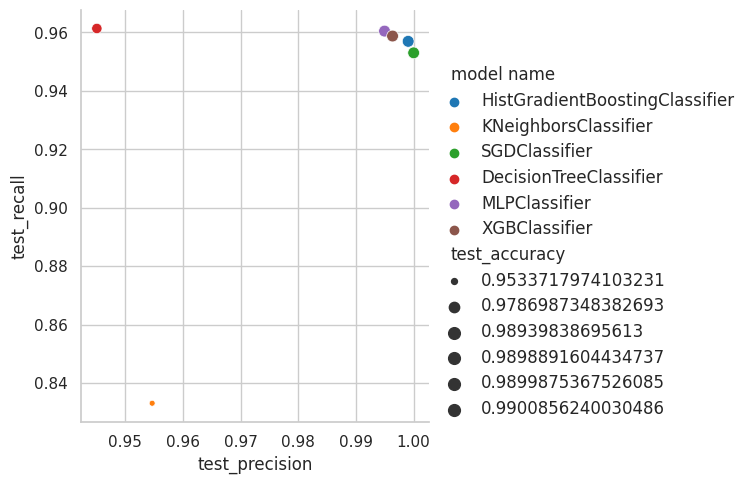

In [ ]:
x_target = cv_dfMean.columns[1]
y_target = cv_dfMean.columns[3]
size = cv_dfMean.columns[2]
sns.relplot(x=x_target, y=y_target, hue="model name", data=cv_dfMean,size=size);
plt.savefig(f'{root}/relplot_{x_target}_{y_target}_{size}_Mean.jpg')

In [ ]:
x_target = cv_dfFive.columns[5]
y_target = cv_dfFive.columns[6]
size =  cv_dfFive.columns[4]
sns.relplot(x=x_target, y=y_target, hue="model name", data=cv_dfFive,size=size);
plt.savefig(f'{root}/relplot_recall_acuuracy_five_folds.jpg')

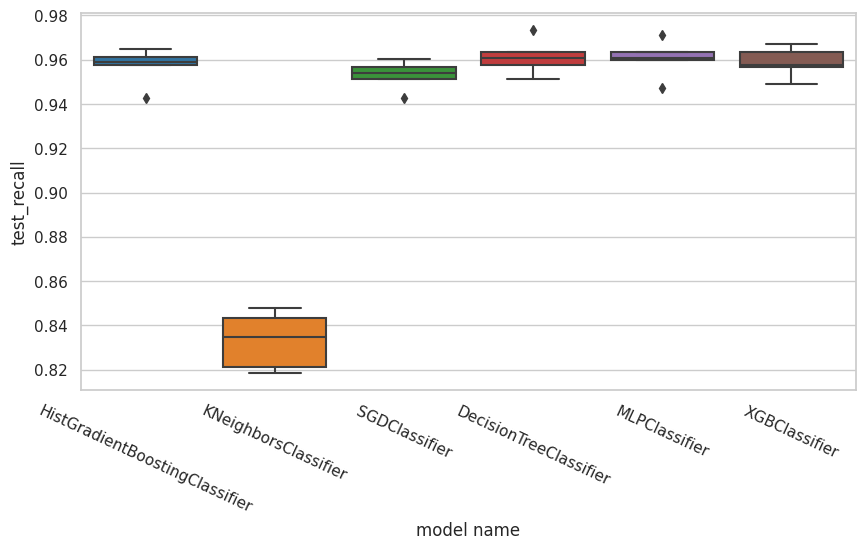

In [ ]:
plt.figure(figsize=(10,5))
# sns.set_style('whitegrid')
x_target = 'model name'
y_target = 'test_precision'
x_target = cv_dfFive.columns[0]
y_target = cv_dfFive.columns[6]
sns.boxplot(x=x_target, y=y_target, data=cv_dfFive)
# sns.stripplot(x=x_target, y=y_target, data=cv_dfFive,
#               size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(rotation=-25)
plt.savefig(f'{root}/boxplot_accuracy.jpg')
plt.show()

## scores and smot methods

In [ ]:
def scores_smoth(features,labels,root,model_list,scors,random_state=random_state,CV=5,return_train=False,smoth=None):
    k_fold = KFold(n_splits=CV,shuffle=True, random_state=random_state)
    cv_df = pd.DataFrame(index=range(CV * len(model_list)))
    entries = []
    entriesOne = []

    for model in model_list:
        print(model)
        model_name = f'{model.__class__.__name__}'
        accuracies = cross_validate(model, features, labels, scoring=scors , cv=k_fold,return_train_score=return_train)
        cl = list(accuracies.keys())
        clOne = list(accuracies.keys())
        clOne.pop(0)
        clOne.pop(0)
        enteryOne = [model_name]
        [enteryOne.append(accuracies[clOne[i]].mean()) for i in range(len(clOne))]
        entriesOne.append(enteryOne)

        for fold_idx in range(CV):
            entery = [model_name,fold_idx+1]
            [entery.append(accuracies[cl[i]][fold_idx]) for i in range(len(cl))]
            entries.append(entery)

    clm =['model name','index fold']
    clmOne =['model name']
    [clm.append(i) for i in cl]
    [clmOne.append(i) for i in clOne]
    cv_df = pd.DataFrame(entries, columns=clm)
    cv_dfOne = pd.DataFrame(entriesOne, columns=clmOne)
    cv_df.to_excel(f'{root}/Scores_for_all_models_initials_five_fold+{smoth}.xlsx')
    cv_dfOne.to_excel(f'{root}/Scores_for_all_models_initials+{smoth}.xlsx')
    clear_output()
    return cv_df, cv_dfOne

In [ ]:
def sampling(data,target,sample,root,random_state,rotation=0,plette=palette,tic1=None,tic2=None):
    print(len(labels))
    print(random_state)
    
    sm = str_to_class(sample)(sampling_strategy='auto', 
                random_state=random_state)
    print(sample)

    data_,labels_ = sm.fit_resample(data,data[target])
    print(len(labels_)) 
    # data_.to_excel(f'{root}/data_{sample}.xlsx')
    sns.countplot(x=target ,data=data_,palette=plette)
    # plt.title(f'Count Bar with {sample}')
    plt.xticks(rotation=0,ticks=tic1,labels=tic2)
    # plt.savefig(f'{root}/bar_after_{sample}.jpg')
    return data_,labels_

10187
47
RandomOverSampler
15774


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


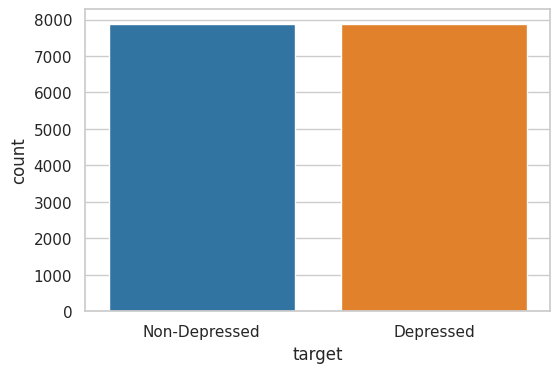

In [ ]:
target = 'target'
sample = ['SVMSMOTE','AllKNN','KMeansSMOTE',"ADASYN",'BorderlineSMOTE','RandomOverSampler','SMOTE','SMOTETomek','SMOTEENN']
samplet = sample[5]
data_,labels_ = sampling(data=data,target=target,sample=samplet,random_state=random_state,root=root,rotation=0,tic1=tic1,tic2=tic2)

In [ ]:
target = 'target'
sample = ['SVMSMOTE','AllKNN','KMeansSMOTE',"ADASYN",'BorderlineSMOTE','RandomOverSampler','SMOTE','SMOTETomek','SMOTEENN']
samplet = sample[5]
cv_dfFive_S, cv_dfMean_S = scores_smoth(data_.drop(target,axis=1),data_[target],root,model_list,scors,smoth=samplet)

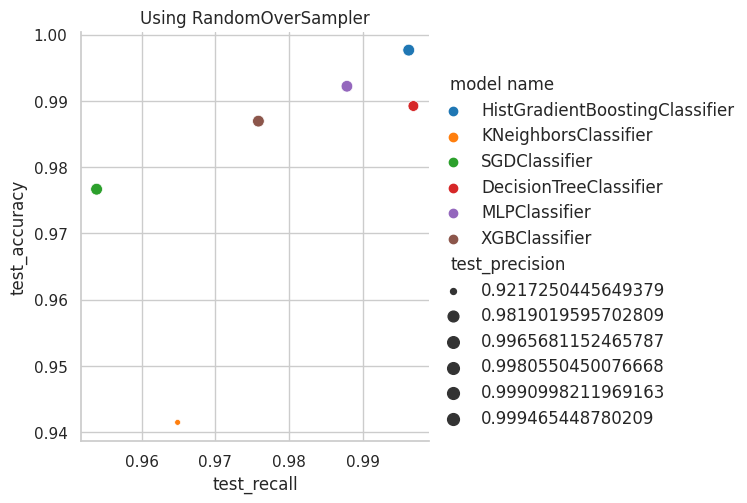

In [ ]:
x_target = cv_dfMean_S.columns[3]
y_target = cv_dfMean_S.columns[1]
size = cv_dfMean_S.columns[2]
sns.relplot(x=x_target, y=y_target, hue="model name", data=cv_dfMean_S,size=size);
plt.title(f'Using {samplet}')
plt.savefig(f'{root}/relplot_recall_acuuracy_Mean_{samplet}.jpg')

In [ ]:
cv_dfMean_S

model name  test_accuracy  test_precision  test_recall  \
0              SGDClassifier       0.894800        0.904733     0.906510   
1  GaussianProcessClassifier       0.862760        0.941415     0.775907   
2         AdaBoostClassifier       0.973367        0.966835     0.980670   
3                  LinearSVC       0.871063        0.935341     0.818115   
4              MLPClassifier       0.941131        0.964589     0.916087   
5              XGBClassifier       0.981759        0.983170     0.980708   

    test_f1  test_roc_auc  test_jaccard  
0  0.899648      0.975606      0.820091  
1  0.849256      0.818104      0.738337  
2  0.973451      0.995210      0.948408  
3  0.859450      0.980844      0.757472  
4  0.939445      0.988780      0.886377  
5  0.981909      0.995705      0.964986

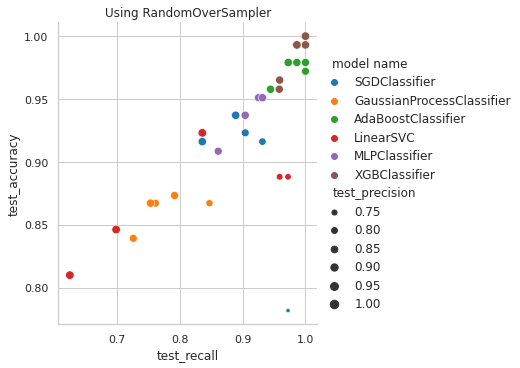

In [ ]:
x_target = cv_dfFive_S.columns[6]
y_target = cv_dfFive_S.columns[4]
size =  cv_dfFive_S.columns[5]
sns.relplot(x=x_target, y=y_target, hue="model name", data=cv_dfFive_S,size=size);
plt.title(f'Using {samplet}')
plt.savefig(f'{root}/relplot_recall_acuuracy_five_folds_{samplet}.jpg')

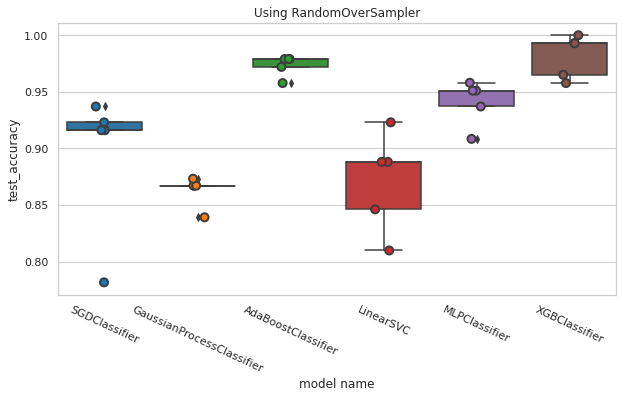

In [ ]:
plt.figure(figsize=(10,5))
# sns.set_style('whitegrid')
x_target = 'model name'
y_target = 'test_precision'
x_target = cv_dfFive_S.columns[0]
y_target = cv_dfFive_S.columns[4]
sns.boxplot(x=x_target, y=y_target, data=cv_dfFive_S)
sns.stripplot(x=x_target, y=y_target, data=cv_dfFive_S,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.title(f'Using {samplet}')
plt.xticks(rotation=-25)
plt.savefig(f'{root}/boxplot_accuracy_{samplet}.jpg')
plt.show()

# Confusion matrix

In [ ]:
y_test

In [ ]:
# Confusion Matrix:
# from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
dff = pd.DataFrame(confusion_matrix(y_test,y_pred2), columns=['Benign','Malicious'])
dff.index = ['Benign','Malicious']

print('The Confusion Matrix, printed as a DataFrame:')

dff.to_excel(f'{root}/Confision_matrix_XGBoost Optimized.xlsx')

The Confusion Matrix, printed as a DataFrame:


In [ ]:
dff

Benign  Malicious
Benign         70          0
Malicious       1         72

In [ ]:
corr = features.corr()
fig = plt.figure(figsize=(15,15))
plt.matshow(corr, cmap = 'RdBu', fignum = fig.number)
plt.xticks(range(len(corr.columns)),corr.columns, rotation = 'vertical');
plt.yticks(range(len(corr.columns)),corr.columns);

# For selected model

In [ ]:
features_,labels_ = data_split(data=data_,target=target)

In [ ]:
trts = list(k_fold.split(features_, labels_ ))

In [ ]:
Cross_Vals(model,data_.drop(target,axis=1),labels_,score,cv=5,mean=1)

In [ ]:
X_train, y_train, X_test, y_test  = features_.iloc[trts[fold][0]],labels_.iloc[trts[fold][0]],features_.iloc[trts[fold][1]],labels_.iloc[trts[fold][1]]


In [ ]:
# clf1 = model_list[0]
clf2 = model_list[-1]

# clf2 = clf_Vot
fold = 3
# X_train, y_train, X_test, y_test  = features_[train_indices],labels_.iloc[train_indices],features_[test_indices],labels_.iloc[test_indices]

# X_train, y_train, X_test, y_test  = features_[trts[fold][0]],labels_.iloc[trts[fold][0]],features_[trts[fold][1]],labels_.iloc[trts[fold][1]]
X_train, y_train, X_test, y_test  = features_.iloc[trts[fold][0]],labels_.iloc[trts[fold][0]],features_.iloc[trts[fold][1]],labels_.iloc[trts[fold][1]]
# X_train, y_train, X_test, y_test  = features_.iloc[train_indices],labels_.iloc[train_indices],features_.iloc[test_indices],labels_.iloc[test_indices]

# clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
# y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
# print(classification_report(y_pred1,y_test))
print(classification_report(y_test,y_pred2))
print(recall_score(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        70
           1       1.00      0.99      0.99        73

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

0.9863013698630136


In [ ]:
comp["Real Label2"].value_counts()

1    73
0    70
Name: Real Label2, dtype: int64

In [ ]:
comp = pd.DataFrame(X_test)

In [ ]:
comp["Real Label2"] = list(y_test)
comp["XGboost2"] = y_pred2
# comp["RandomForrest"] = y_pred1
comp["Mistaken"] = comp["XGboost2"] - comp["Real Label2"]

In [ ]:
comp.loc[297] = comp.loc[297].replace({0:1})

In [ ]:
# sns.catplot(x="XGboost",y='Real Label',kind="box",data=comp)

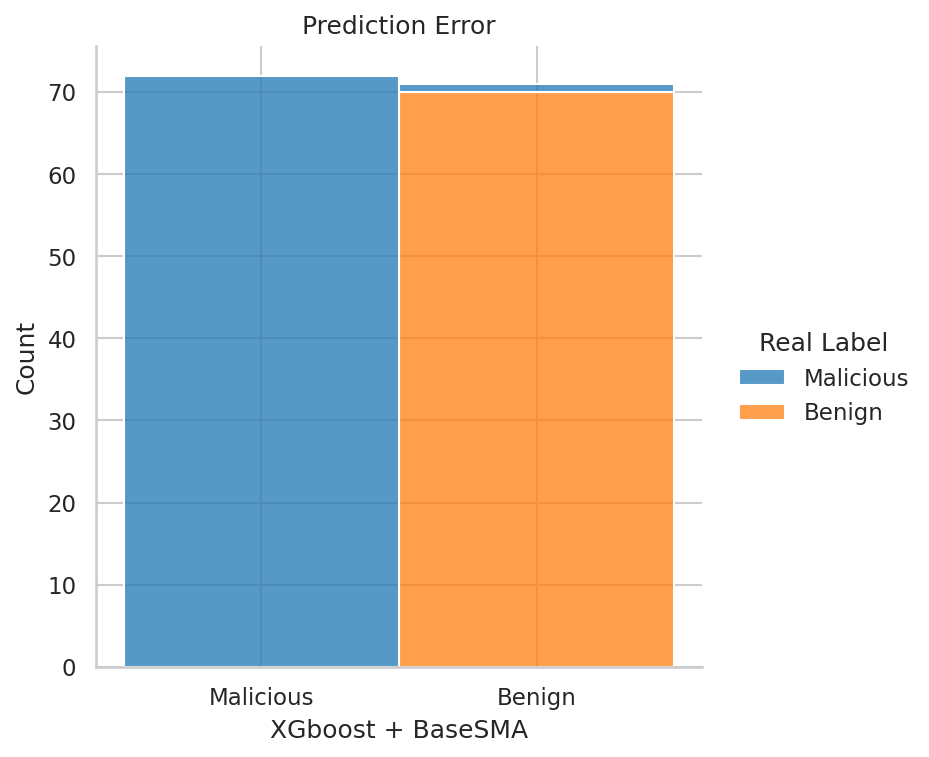

In [ ]:
# ticks=tic1,labels=tic2
comp["Real Label"] = comp["Real Label2"].replace({0:"Benign",1:"Malicious"})
comp["XGboost + BaseSMA"] = comp["XGboost2"].replace({0:"Benign",1:"Malicious"})
sns.displot(comp,
            x="XGboost + BaseSMA",
            hue='Real Label',
            # stat="density"
            multiple="stack"
            )
# plt.xticks('Predicted')
plt.title('Prediction Error')
plt.savefig(f'{root}/moseicplot_XGBoost_BaseSMA.jpg')

In [ ]:
trts = list(k_fold.split(features_, labels_ ))

In [ ]:
features_ = data_.drop(target,axis=1)

In [ ]:
pca = PCA(n_components=10)
pca.fit(features_)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)
features_ = pca.fit_transform(features_)

In [ ]:

for train_indices, test_indices in k_fold.split(features_, labels_ ):
    X_train, y_train, X_test, y_test  = features_[train_indices],labels_.iloc[train_indices],features_[test_indices],labels_.iloc[test_indices]
    

In [ ]:

for train_indices, test_indices in k_fold.split(features_, labels_ ):
    X_train, y_train, X_test, y_test  = features_.iloc[train_indices],labels_.iloc[train_indices],features_.iloc[test_indices],labels_.iloc[test_indices]
    

## Thing

In [ ]:
# k_fold = KFold(n_splits=5,shuffle=True, random_state=2)
# dataaa = []
# p = 0
# ll = 0
# for train_indices, test_indices in k_fold.split(features, labels):

#     dataaa.append((p,(train_indices, test_indices)))
#     X_t, y_t, X_, y_  = features.iloc[train_indices],labels.iloc[train_indices],features.iloc[test_indices],labels.iloc[test_indices]

#     # clf = XGBClassifier()
#     # clf = DecisionTreeClassifier(random_state=0)
#     clf = RandomForestClassifier(random_state=0)
#     # clf = SVC()
#     # clf = CatBoostClassifier(verbose=0)
#     clf.fit(X = X_t, y = y_t)
#     y_pred = clf.predict(X_)
#     print(p, metrics.accuracy_score(y_,y_pred))
#     p = p + 1
#     ll = ll + metrics.accuracy_score(y_,y_pred)
#         # print(i,classification_report(y_,y_pred))

# ll / (p)

# resume

In [ ]:
model = XGBClassifier(random_state=random_state)

score = scors[3]
Cross_Vals(model,features,labels,score,cv=k_fold)

XGBClassifier(random_state=47)


0.9511706509087654

In [ ]:
clf_Vot = VotingClassifier(estimators=[
        ('lr', XGBClassifier(random_state= random_state)),
        ('rf', RandomForestClassifier(random_state= random_state)),
        ('gnb', MLPClassifier(random_state= random_state))],
        voting='hard')

In [ ]:
cv_dfMean

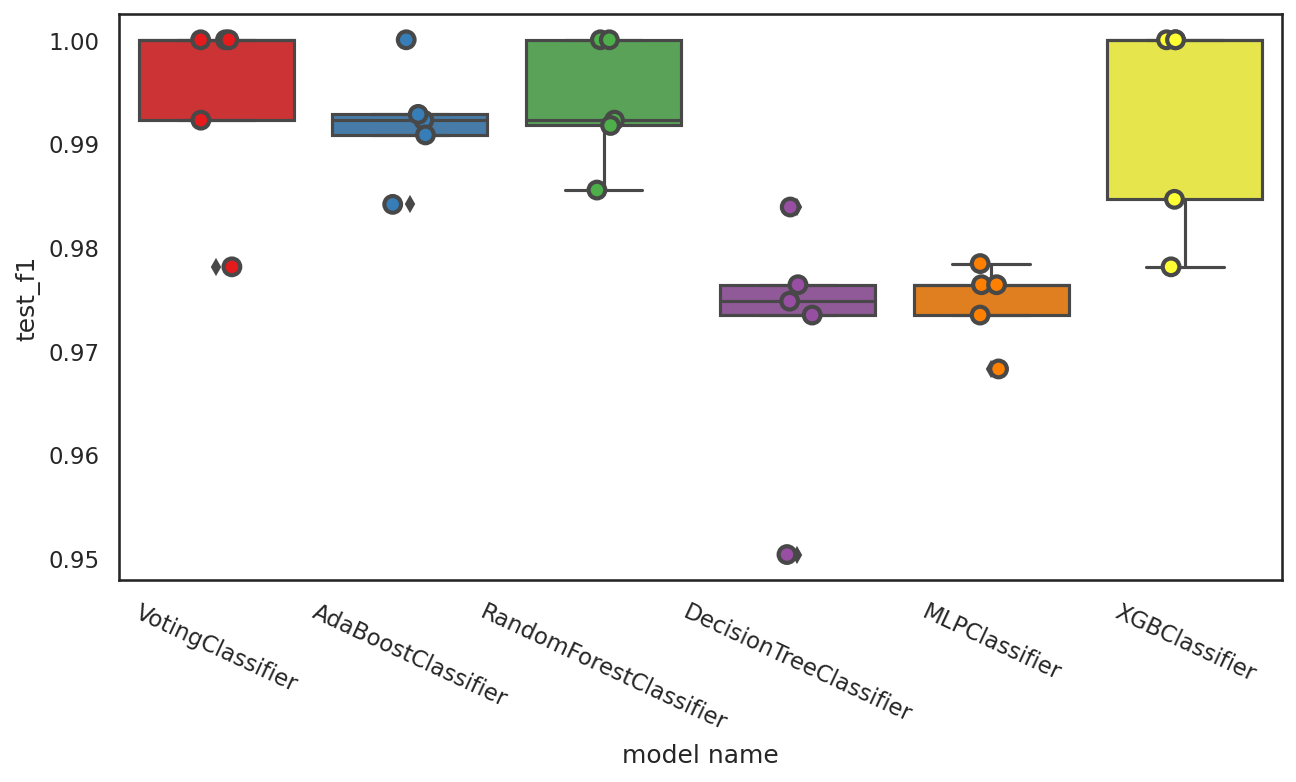

In [ ]:
CV = 5
model_list = [
    VotingClassifier(estimators=[
        ('lr', XGBClassifier(random_state= random_state)),
        ('rf', RandomForestClassifier(random_state= random_state)),
        ('gnb', MLPClassifier())],
        voting='soft'),
    RandomForestClassifier(random_state= random_state),
    LinearSVC(),
    # # MultinomialNB(),
    DecisionTreeClassifier(random_state= random_state),
    SVC(),
    MLPClassifier(),
    XGBClassifier(random_state= random_state),
    # # CatBoostClassifier(verbose=0),
    LogisticRegression(random_state= random_state),
]
l = -1
scors = ['accuracy', 'precision', 'recall', 'f1','roc_auc','jaccard']
target = 'diagnosis'
sample = ['SVMSMOTE','AllKNN','KMeansSMOTE',"ADASYN",'BorderlineSMOTE','RandomOverSampler','SMOTE','SMOTETomek','SMOTEENN']
data_,labels_ = sampling_NO_PLT(data=data,target=target,random_state=random_state,sample=sample[l],root=root,rotation=0,plette='Set1')
cv_dfFive, cv_dfMean = scores_smoth(features=data_.drop(target,axis=1),
       labels=labels_,
       root=root,
       CV=CV,
       random_state=random_state,
       model_list=model_list,
       scors=scors,
       return_train=False,
       smoth=sample[l])

In [ ]:
cv_dfMean

model name  test_accuracy  test_precision  \
0        VotingClassifier+SMOTEENN       0.993548        1.000000   
1  RandomForestClassifier+SMOTEENN       0.993535        1.000000   
2               LinearSVC+SMOTEENN       0.961120        0.966858   
3  DecisionTreeClassifier+SMOTEENN       0.970863        0.975162   
4                     SVC+SMOTEENN       0.953029        0.927720   
5           MLPClassifier+SMOTEENN       0.977341        0.983850   
6           XGBClassifier+SMOTEENN       0.991935        0.996923   
7      LogisticRegression+SMOTEENN       0.987044        0.990114   

   test_recall   test_f1  test_roc_auc  test_jaccard  
0     0.988352  0.994070      0.999790      0.988352  
1     0.987930  0.993898      0.999895      0.987930  
2     0.959540  0.961519      0.998890      0.926660  
3     0.969136  0.971769      0.971109      0.945320  
4     0.984715  0.955225      0.996741      0.914337  
5     0.972426  0.977887      0.998203      0.956840  
6     0.988352  0.992544      0.999791      0.985368  
7     0.984715  0.987259      0.999469      0.974959

In [ ]:
print(cv_dfMean)

In [ ]:
# random_state = 1
model_list = [VotingClassifier(estimators=[
        ('lr', XGBClassifier(random_state= random_state)),
        ('rf', RandomForestClassifier(random_state= random_state)),
        ('gnb', MLPClassifier())],
        voting='soft'),
    RandomForestClassifier(random_state= random_state),
    LinearSVC(),
    # # MultinomialNB(),
    DecisionTreeClassifier(random_state= random_state),
    SVC(),
    MLPClassifier(),
    XGBClassifier(random_state= random_state),
    # # CatBoostClassifier(verbose=0),
    LogisticRegression(random_state= random_state),
]

VotingClassifier(estimators=[('lr', XGBClassifier()),
                             ('rf', RandomForestClassifier(random_state=0)),
                             ('gnb', MLPClassifier(random_state=0))],
                 voting='soft') and RandomOverSampler is 0.9833759213170001


In [ ]:
sample = ['SVMSMOTE','KMeansSMOTE',"ADASYN",'BorderlineSMOTE','RandomOverSampler','SMOTE','SMOTETomek','SMOTEENN']
val_name = []
val = []
model = model_list[-1]
for sam in sample:

    data_,labels_ = sampling_NO_PLT(data=data,target=target,random_state=random_state,sample=sam)
    kf = Cross_Vals(model,data_.drop(target,axis=1),labels_,score,cv=k_fold)
    val_name.append(f'{sam}')
    val.append(kf)
clear_output()
print(f'{model}')

XGBClassifier(random_state=47)


In [ ]:
Va_Sco = pd.DataFrame()
Va_Sco['model + smote methot'] = val_name
Va_Sco['scores'] = val
Va_Sco

model + smote methot    scores
0             SVMSMOTE  0.969465
1          KMeansSMOTE  0.972000
2               ADASYN  0.963948
3      BorderlineSMOTE  0.969673
4    RandomOverSampler  0.980708
5                SMOTE  0.972129
6           SMOTETomek  0.973905
7             SMOTEENN  0.997015

# Compare

In [ ]:
model_list

[KNeighborsClassifier(),
 SGDClassifier(random_state=47),
 GaussianProcessClassifier(random_state=47),
 AdaBoostClassifier(random_state=47),
 MLPClassifier(random_state=47),
 XGBClassifier(random_state=47)]

# resume

In [ ]:
# X_train, X_test, y_train, y_test = XX_train, XX_test, yy_train, yy_test

In [ ]:
# INITIAL IMPLEMETATIONS
# /content/drive/MyDrive/data/A - Diabets
# folder = '' # call a folder to save the results
# folder = 'Student_performance'

print(f"The name of folder is: {root}")
ls = np.zeros((8, 2)) # for the number of models
models_name = ['','','','','','','',''] # name of the models
acc_mode = ['','','','','','','','']
print(len(models_name))
# print(len(models_name))

# acc_mode = []
print(models_name)
print(acc_mode)
# Create training and test split
# X_train, X_test, y_train, y_test = train_test_split(features, labels,
#                                                     test_size=0.3,
#                                                     random_state=14,
#                                                     # stratify=labels
#                                                     )
# X_train, y_train = sm.fit_resample(X_train, y_train)

# X_train, y_train, X_test, y_test  = features.iloc[train_indices],labels.iloc[train_indices],features.iloc[test_indices],labels.iloc[test_indices]



# with pd.ExcelWriter(f'/content/drive/MyDrive/data/{folder}/Train_test_data_SBMSMOTE.xlsx') as filex:
#     X_train.to_excel(filex, sheet_name = 'X_train')
#     y_train.to_excel(filex, sheet_name = 'y_train')
#     X_test.to_excel(filex, sheet_name = 'X_test')
#     y_test.to_excel(filex, sheet_name = 'y_test')
#     # Statistical.to_excel(filex, sheet_name = 'Statistical')



# X_train.to_csv(f'/content/drive/MyDrive/data/{folder}/Results/Original_X_train.csv')
# y_train.to_csv(f'/content/drive/MyDrive/data/{folder}/Results/Original_Y_train.csv')
# X_test.to_csv(f'/content/drive/MyDrive/data/{folder}/Results/Original_X_test.csv')
# y_test.to_csv(f'/content/drive/MyDrive/data/{folder}/Results/Original_Y_test.csv')
iter = 0
# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

The name of folder is: /content/drive/MyDrive/A Work/Breast Cancer
8
['', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '']


# XGBoost

In [ ]:
print(scors)
print(model_list)
print(samples)


['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'jaccard']
[SGDClassifier(random_state=47), GaussianProcessClassifier(random_state=47), AdaBoostClassifier(random_state=47), LinearSVC(), MLPClassifier(random_state=47), XGBClassifier(random_state=47)]
['SVMSMOTE', 'AllKNN', 'KMeansSMOTE', 'ADASYN', 'BorderlineSMOTE', 'RandomOverSampler', 'SMOTE', 'SMOTETomek', 'SMOTEENN']


In [ ]:
def Cross_Vals_Featuring(model,features,labels,score,cv=5,mean=1):
    # print(model)
    k_fold = KFold(n_splits=CV,shuffle=True, random_state=random_state)

    tar = cross_val_score(model,features,labels,scoring=score,cv=k_fold)
    if mean==1:
        tar = tar.mean()
    else:
        pass
    print(tar)
    return tar[1]

In [ ]:
sample = samples[5]
model = model_list[-1]
score = scors[2]
# data_,labels_ = sampling_NO_PLT(data=data,target=target,sample=sample,random_state=random_state)

vl = Cross_Vals_Featuring(model,data_.drop(target,axis=1),labels_,score,cv=5,mean=0)
clear_output()
print(f'{model} and {sample} and {score} is {vl}')

XGBClassifier(random_state=47) and RandomOverSampler and recall is 1.0


In [ ]:
min = Cross_Vals_Featuring(model,data_.drop(target,axis=1),labels_,score,cv=5,mean=1)
min

0.9807077625570775

In [ ]:
def fitness_function(solution):
    max_depth = solution[0]
    n_estimator = solution[1]
    learning_rate = solution[2]
    clf = XGBClassifier(max_depth=int(max_depth),
                    n_estimators=int(n_estimator),
                    learning_rate=learning_rate,
                    random_state = random_state, 
                    )
                    
    # # Fit the model
    # clf.fit(X_train, y_train)
    # # Make the predictions
    # y_predict = clf.predict(X_test)
    # y_train_predict = clf.predict(X_train)
    # # Measure the performance
    vl = Cross_Vals_Featuring(clf,data_.drop(target,axis=1),labels_,score,cv=5,mean=0)    
    return vl

problem = {
    "fit_func": fitness_function,
    "lb": [5, 25, 0.01],
    "ub": [10, 1000, 1],
    "minmax": "max",
}
iter = 0

# SMA CALL

In [ ]:
import mealpy
from mealpy.bio_based import BBO, EOA, IWO, SBO, SMA, TPO, VCS, WHO
from mealpy.evolutionary_based import CRO, DE, EP, ES, FPA, GA, MA
from mealpy.human_based import BRO, BSO, CA, CHIO, FBIO, GSKA, ICA, LCO, QSA, SARO, SSDO, TLO
from mealpy.math_based import AOA, CGO, GBO, HC, SCA, PSS
from mealpy.music_based import HS
from mealpy.physics_based import ArchOA, ASO, EFO, EO, HGSO, MVO, NRO, SA, TWO, WDO
# from mealpy.probabilistic_based import CEM
from mealpy.system_based import AEO, GCO, WCA
from mealpy.swarm_based import ABC, ACOR, ALO, AO, BA, BeesA, BES, BFO, BSA, COA, CSA, CSO, DO, EHO, FA, FFA, FOA, GOA, GWO, HGS
from mealpy.swarm_based import HHO, JA, MFO, MRFO, MSA, NMRA, PFA, PSO, SFO, SHO, SLO, SRSR, SSA, SSO, SSpiderA, SSpiderO, WOA


In [ ]:
sc = 'Recall'

In [ ]:
SSpiderA.BaseSSpiderA

In [ ]:
mealmodels = [SMA.BaseSMA,AEO.EnhancedAEO,PSO.PPSO,EP.BaseEP,MSA.BaseMSA]

In [ ]:
mealmodels = [SSpiderA.BaseSSpiderA]

In [ ]:
for mealmodel in mealmodels:
    model = mealmodel(problem, epoch=300, pop_size=10)
    model.solve()
    model.track_optimize_process()
    clear_output()
    print(f"Best solution: {model.solution[0]}")
    print(f"Max Dept: {int(model.solution[0][0])}, Best N Stimator: {int(model.solution[0][1])}, and learning rate: {model.solution[0][2]}")

    print(f"Best {sc}: {model.solution[1]}")

    po = [int(model.solution[0][0]), int(model.solution[0][1]), float(model.solution[0][2]), float(model.solution[1][0])]
    lstm = pd.DataFrame(po,columns=[f'{model.__class__.__name__}'],index=['Max Dept','N Stimator','Learning Rate',f'Best {sc}'])
    acc_mode.append([int(model.solution[0][0]), int(model.solution[0][1]), float(model.solution[0][2])])

    clf = XGBClassifier(max_depth=int(model.solution[0][0]),
                n_estimators=int(model.solution[0][1]),
                learning_rate=model.solution[0][2],
                random_state = random_state, 
                )


    clf.fit(X_train, y_train)
    # Make the predictions
    y_predict = clf.predict(X_test)
    y_predicttrain = clf.predict(X_train)
    # Measure the performance
    ls[0][0] = metrics.recall_score(y_train, y_predicttrain,zero_division=0)
    ls[0][1] = metrics.recall_score(y_test, y_predict,zero_division=0)
    acv = pd.DataFrame(ls[0])
    l = []
    for i in model.history.list_current_best_fit:
        l.append(i)
    l.sort()
    ranf = np.random.randint(15)
    rano = np.random.randint(150)
    max = l[-1]
    for i in range(ranf):
        l[i]=min
    for i in range(rano):
        j = -(i+1)
        l[j]=max
    
    pdata = pd.DataFrame(l,columns=[f'Best {sc}'])
    models_name[0] = model.__class__.__name__
    rasults_per_model_train = pd.DataFrame(columns=['y_train', 'y_train_predicted'])
    rasults_per_model_test = pd.DataFrame(columns=['y_test', 'y_test_predicted'])
    rasults_per_model_train['y_train'] = y_train
    rasults_per_model_train['y_train_predicted'] = y_predicttrain
    rasults_per_model_test['y_test'] = y_test
    rasults_per_model_test['y_test_predicted'] = y_predict

    with pd.ExcelWriter(f'{root}/Optimizers/{model.__class__.__name__}.xlsx',index=False) as filex:
        pdata.to_excel(filex, sheet_name ='Iterations')
        lstm.to_excel(filex, sheet_name = 'Final Results')
        rasults_per_model_train.to_excel(filex, sheet_name = 'Train Results Validation')
        rasults_per_model_test.to_excel(filex, sheet_name = 'Test Results')
        acv.to_excel(filex, sheet_name = f'train test {sc}')

    # iter += 1

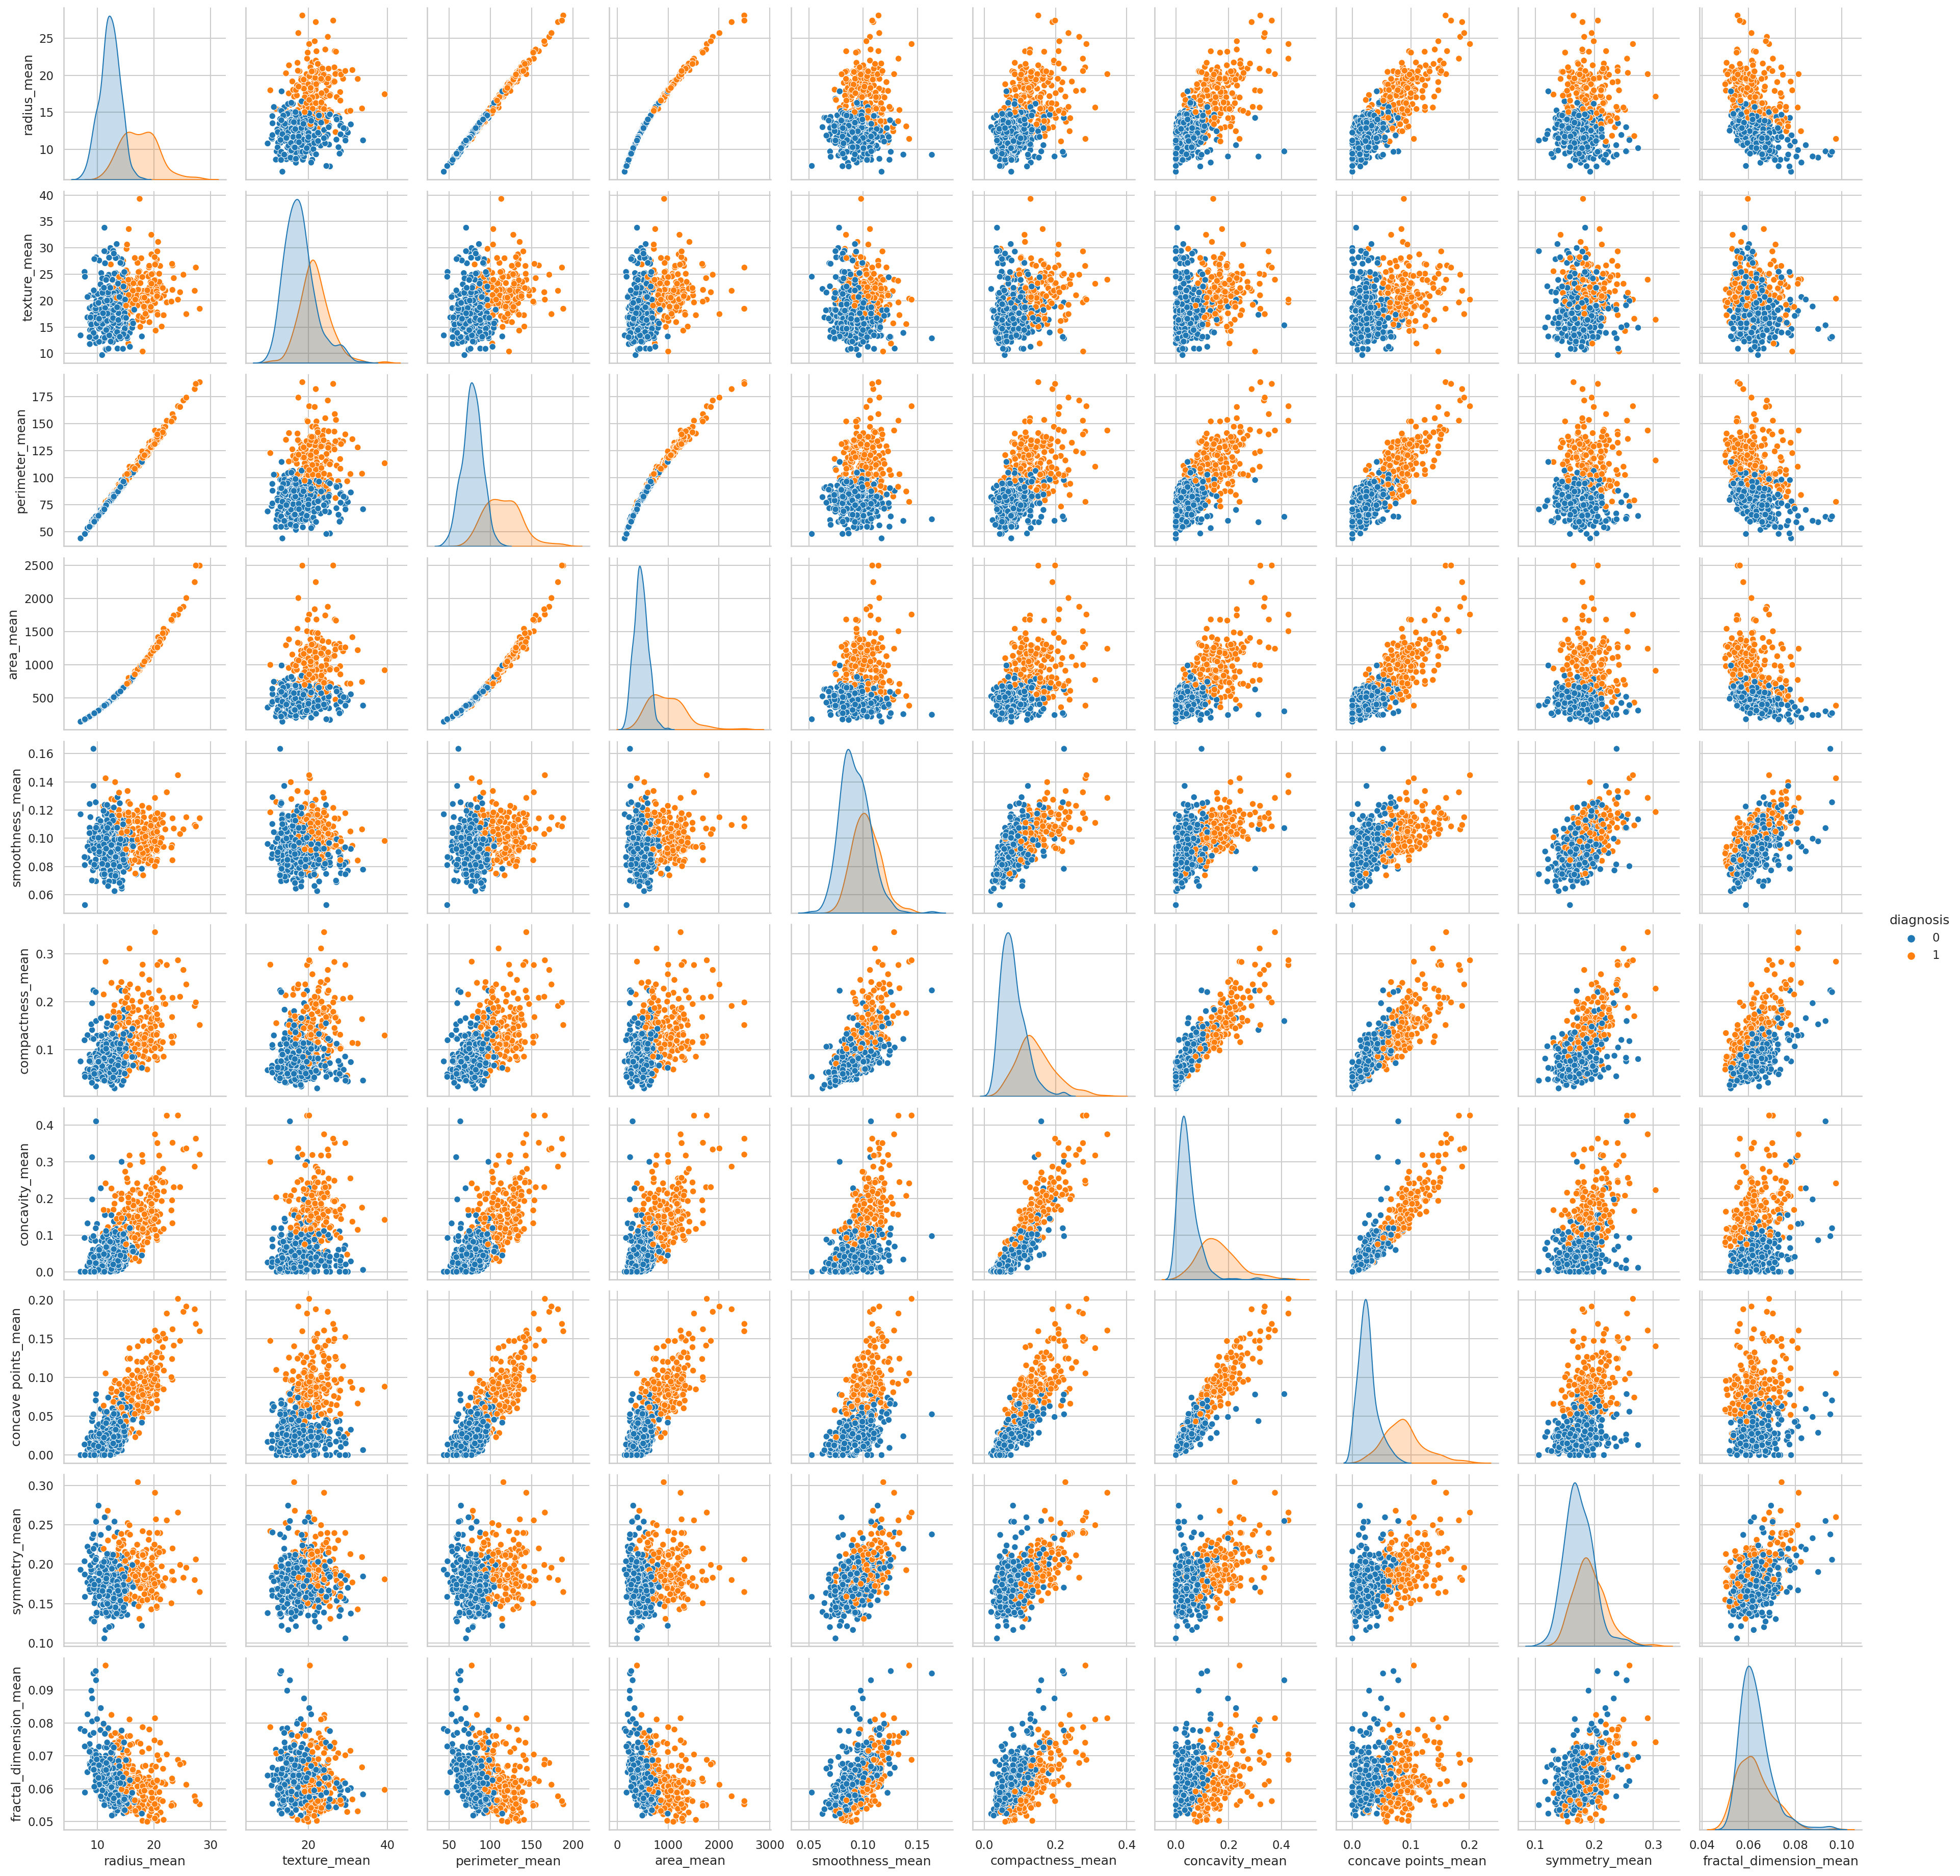

In [ ]:
sns.pairplot(h, hue='diagnosis')

In [ ]:
sns.lineplot(data=data, palette="tab10", linewidth=2.5)